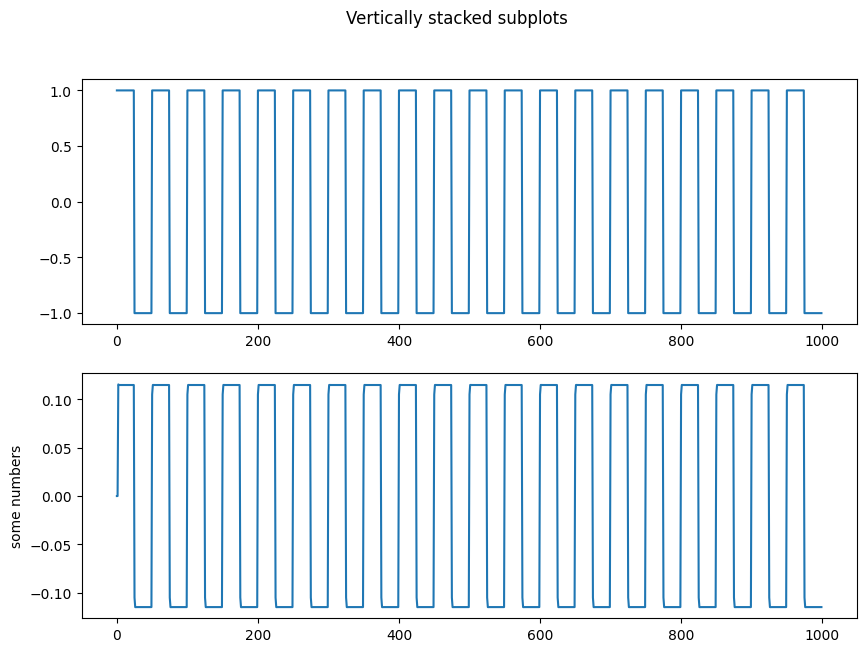

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

l = 1000
#x = np.full((l), 1.0)
y = np.full((l), 0.0)
t = np.arange(0,l)
x=signal.square(2 * np.pi * 20/l * t)

for i in range (2,l):
    y[i]=-0.002*y[i-2]/300-1.6*y[i-1]/300+33*x[i]/300+1.65*x[i-1]/300
fig, axs = plt.subplots(2,figsize=(10,7))
fig.suptitle('Vertically stacked subplots')
plt.ylabel('some numbers')
axs[0].plot(t,x)
axs[1].plot(t,y)
plt.show()


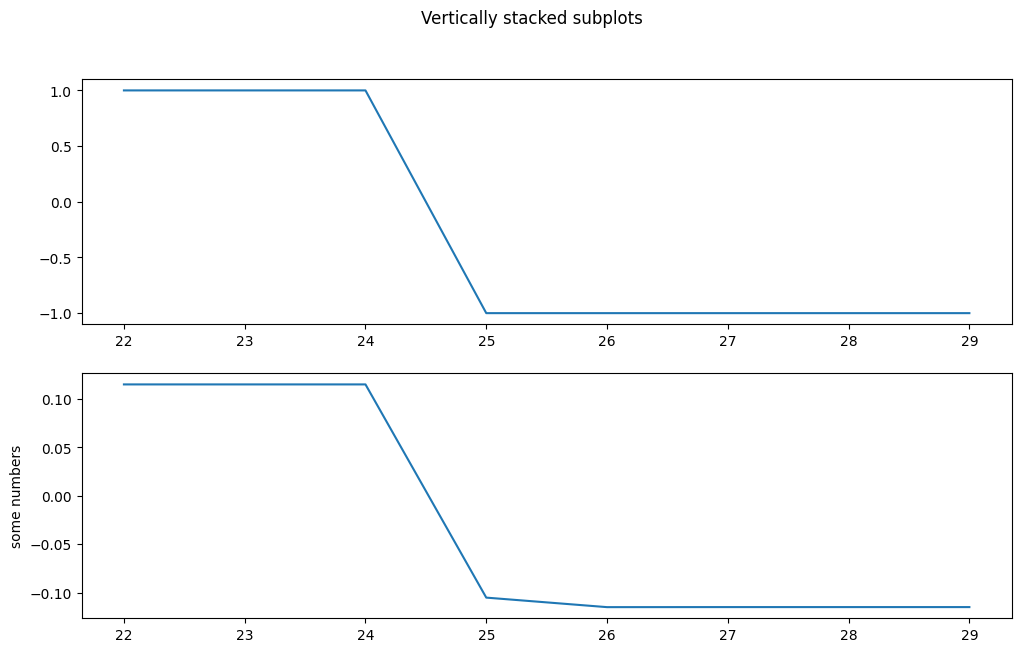

In [22]:
b=22
e=30
fig, axs = plt.subplots(2,figsize=(12,7))
fig.suptitle('Vertically stacked subplots')
plt.ylabel('some numbers')
axs[0].plot(t[b:e],x[b:e])
axs[1].plot(t[b:e],y[b:e])
plt.show()

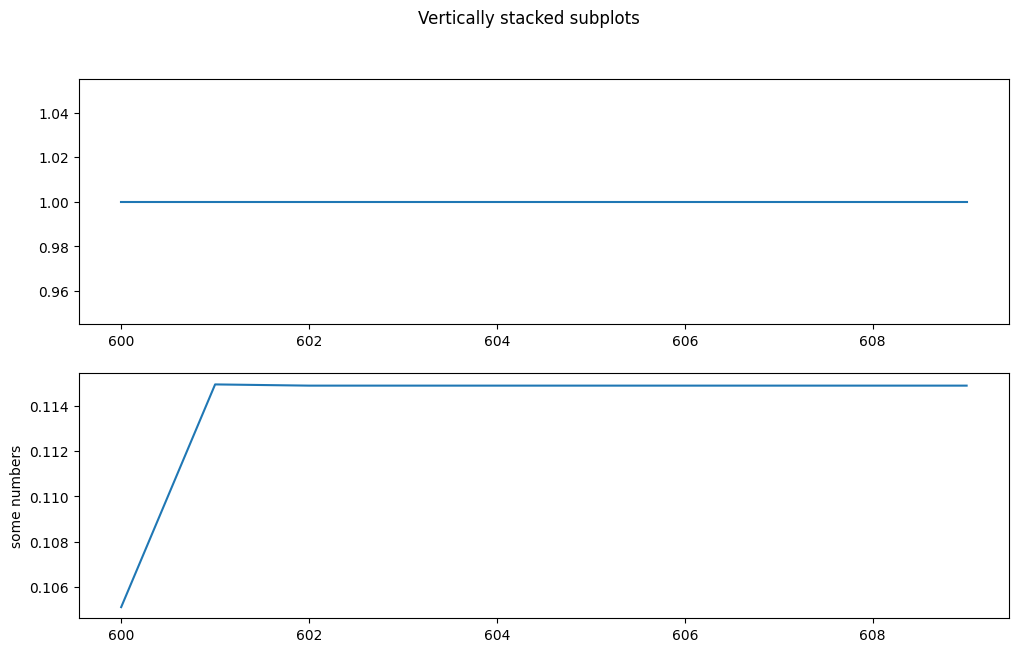

In [23]:
b=600
e=610
fig, axs = plt.subplots(2,figsize=(12,7))
fig.suptitle('Vertically stacked subplots')
plt.ylabel('some numbers')
axs[0].plot(t[b:e],x[b:e])
axs[1].plot(t[b:e],y[b:e])
plt.show()

In [4]:
t1=0.5
t2=1.5
v1=1/t1
v2=1/t2
print ('Vav=',(v1+v2)/2,'Tav=',(t1+t2)/2,'Vwav=',(v1*t1+v2*t2)/2)

Vav= 1.3333333333333333 Tav= 1.0 Vwav= 1.0


In [ ]:
                                      B0          B1              B2              A1              A2
ctrlIIRACCurrentD = SecondOrderIIR( 0.00241810f,  0.00020141f,    -0.00221669f,   -1.39414502f,   0.39414502f);
ctrlIIRACCurrentQ = SecondOrderIIR( 0.00241810f,  0.00020141f,    -0.00221669f,   -1.39414502f,   0.39414502f);
dcbus
ctrlBusVoltageIIR = SecondOrderIIR( 0.00000000f,  0.01504740f,    -0.01498086f,   -1.80834530f,   0.80834530f);
        

In [ ]:

#                                       B0          B1              B2              A1              A2
#ctrlIIRACCurrentD = SecondOrderIIR( 0.00241810f,  0.00020141f,    -0.00221669f,   -1.39414502f,   0.39414502f);
#ctrlIIRACCurrentQ = SecondOrderIIR( 0.00241810f,  0.00020141f,    -0.00221669f,   -1.39414502f,   0.39414502f);
#dcbus
#ctrlBusVoltageIIR = SecondOrderIIR( 0.00000000f,  0.01504740f,    -0.01498086f,   -1.80834530f,   0.80834530f);


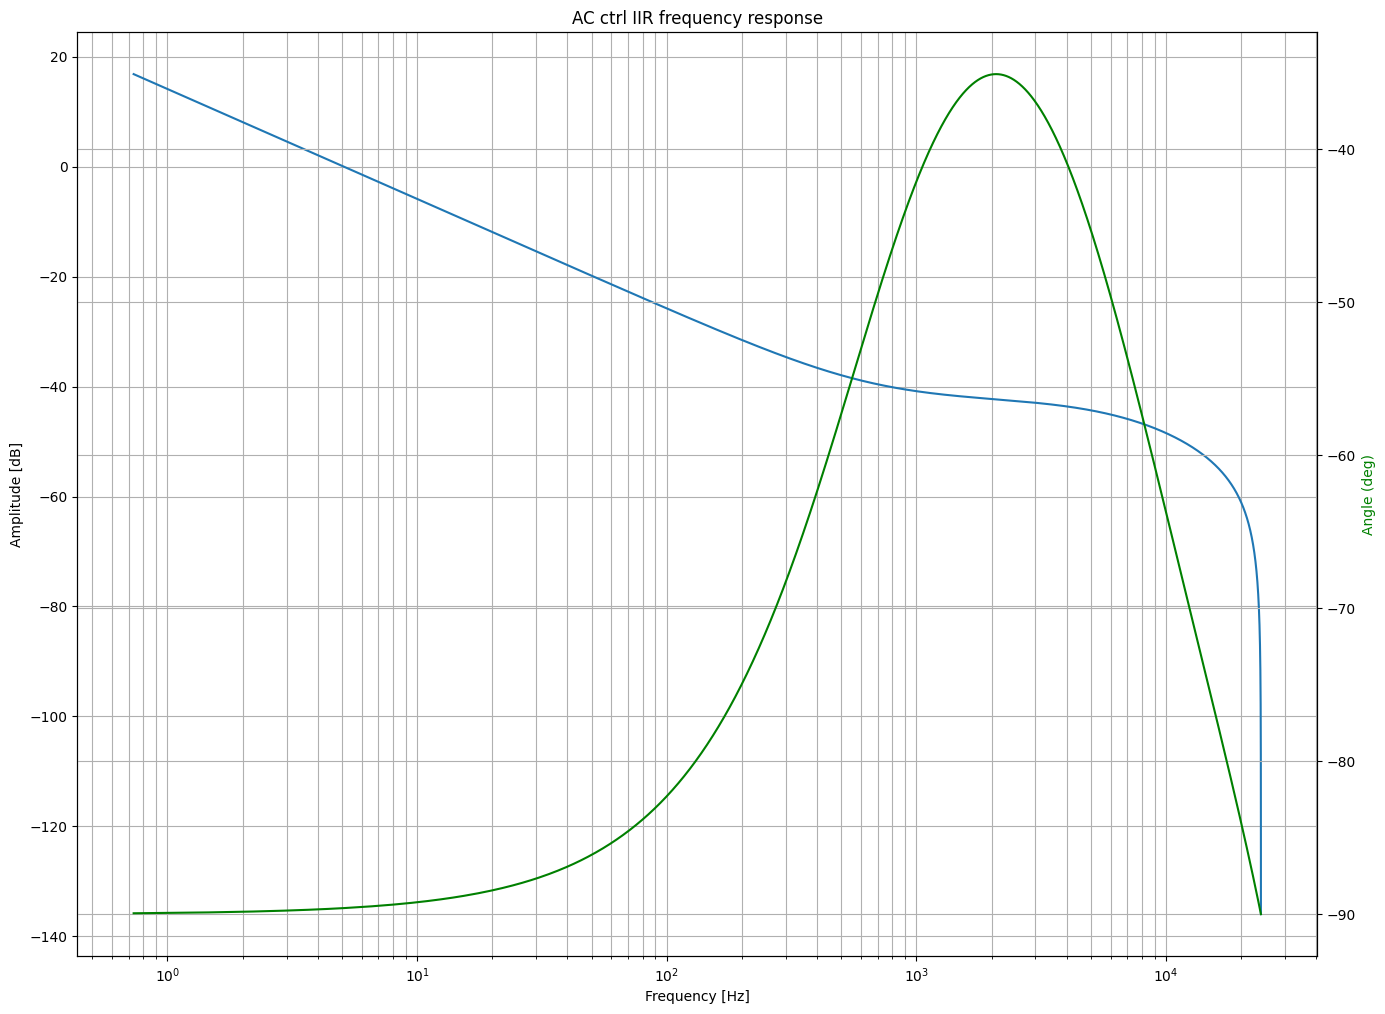

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#      b0          b1          b2 
b_ac=[0.00241810, 0.00020141, -0.00221669]
b_dc=[0.00000000, 0.01504740, -0.01498086]
#     a0=1   a1           a2
a_ac=[1.0,   -1.39414502,   0.39414502]
a_dc=[1.0,   -1.80834530,   0.80834530]

w, h = signal.freqz(b_ac, a_ac, fs=48000*2*np.pi,worN=32768)
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(h)))
ax.set_title('AC ctrl IIR frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
#ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')

ax2 = ax.twinx()
#angles = np.unwrap(np.angle(h))
angles = np.angle(h)
ax2.plot(w/(2*np.pi), angles*180/np.pi, 'g')
ax2.set_ylabel('Angle (deg)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

h1= (0.07652795506386356-7.24260050731506j) 7.243004807154736 size= 65536 f1= 0.3663966850045321


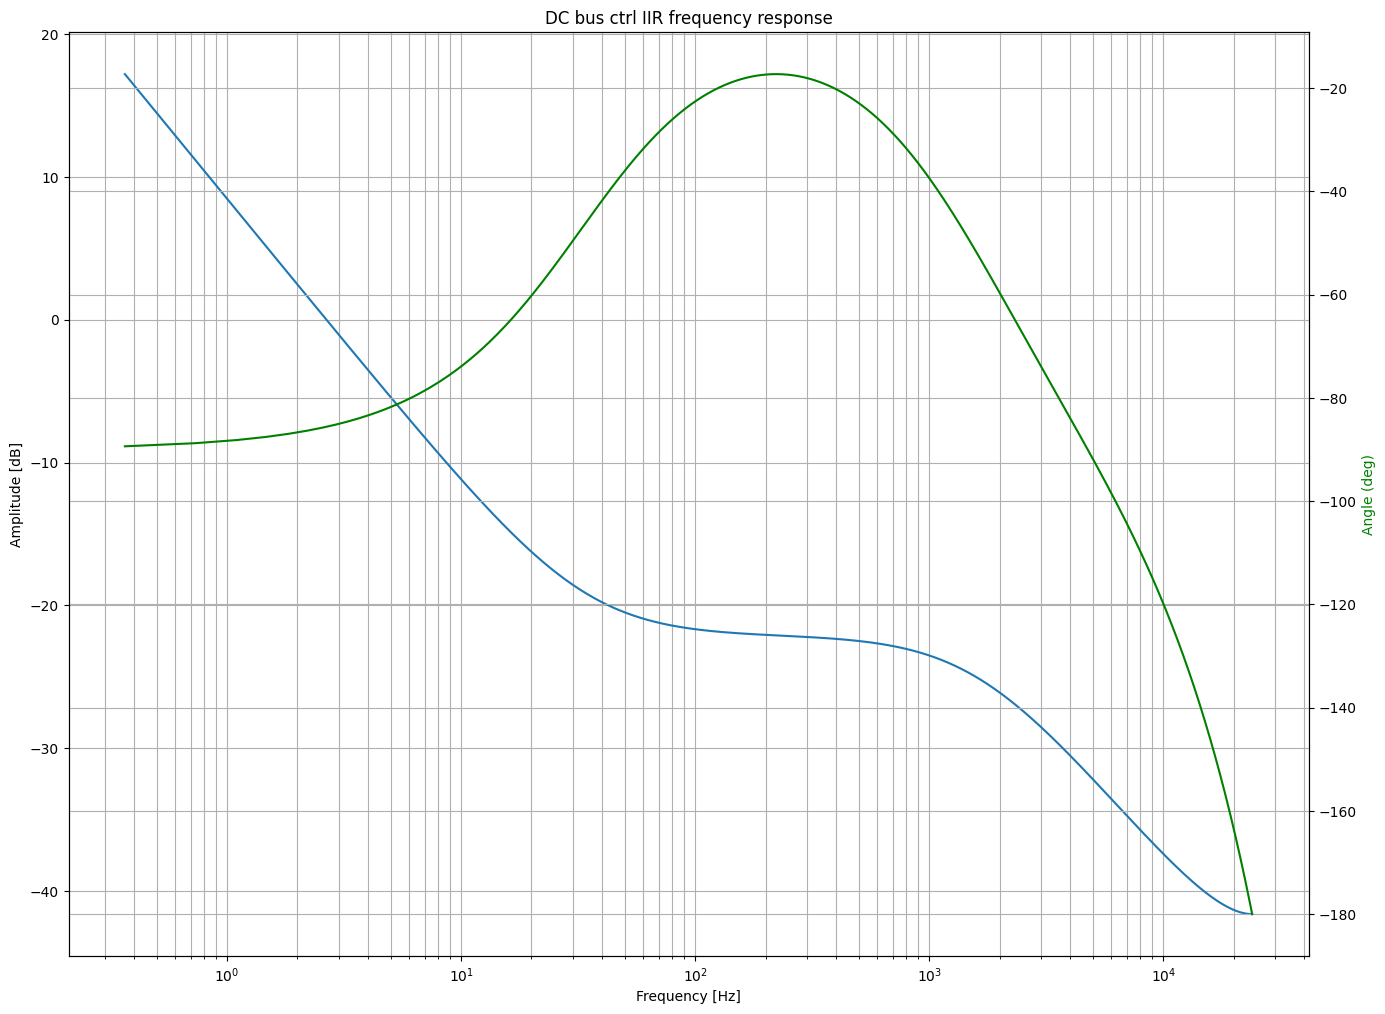

(0.07652795506386356-7.24260050731506j)
-1.5602303557584425


In [74]:
w, h = signal.freqz(b_dc, a_dc, fs=48000*2*np.pi,worN=65536)
print('h1=',h[1],abs(h[1]),'size=',h.size,'f1=',w[1]/6.28)
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(h)))
ax.set_title('DC bus ctrl IIR frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
#ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')

ax2 = ax.twinx()
angles = np.unwrap(np.angle(h))
angles = (np.angle(h))
ax2.plot(w/(2*np.pi), angles*180/np.pi, 'g')
ax2.set_ylabel('Angle (deg)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()
print (h[1])
print(np.angle(h[1]))

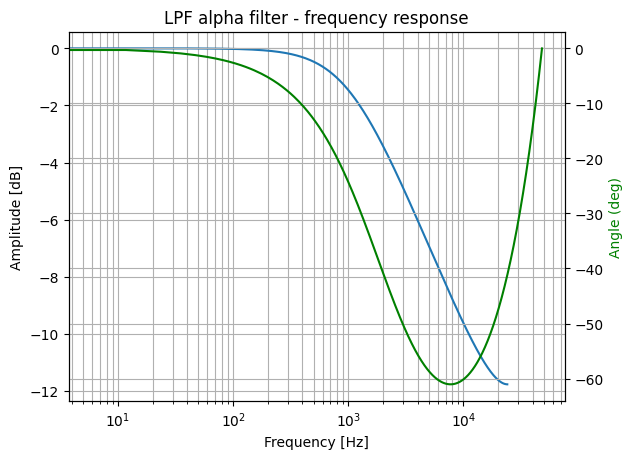

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
alpha=0.125
a=[1,-(1-alpha)]
b=[(alpha)]
w, h = signal.freqz(b, a, fs=48000*2*np.pi,worN=4096)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 10 * np.log10(abs(h)))
ax.set_title('LPF alpha filter - frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
#ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')

ax2 = ax.twinx()
#angles = np.unwrap(np.angle(h))
#angles = (np.angle(h))
angles = (np.arctan2(h.imag,h.real))
ax2.plot(w/(1*np.pi), angles*180/np.pi, 'g')
ax2.set_ylabel('Angle (deg)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

Vou= 2.5396604901874946


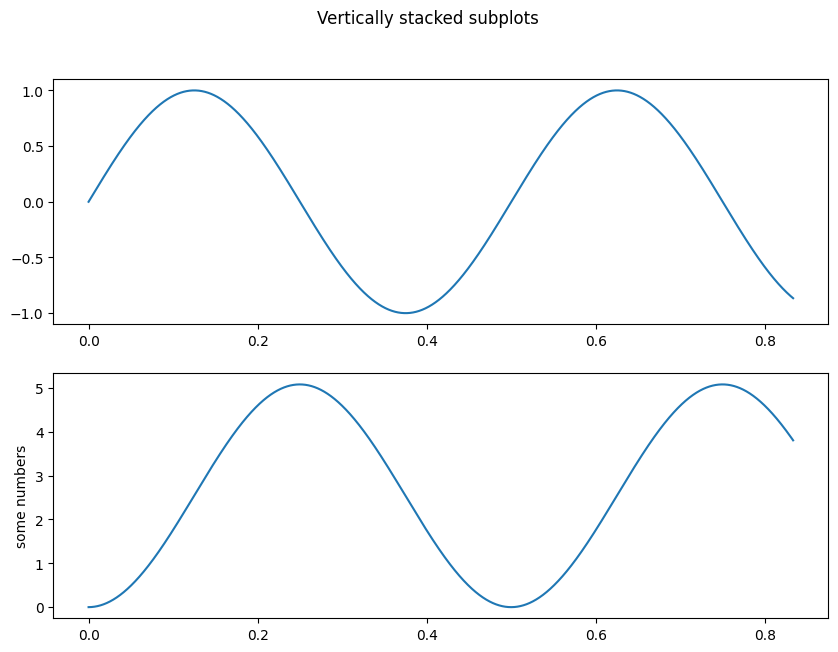

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
#from source code 
B0 = 0.00241810
B1 = 0.00020141 
B2 =-0.00221669
A1 =-1.39414502
A2 = 0.39414502

#Coeficent from marck script
#B0 = 1.612068390629168
#B1 = 0.13427637024631572
#B2 = -1.4777920203828523
#A1 = 1.3941450174486236
#A2 = -0.3941450174486237


################################
nr_samples = 40000  
Fs         = 48000 # sample freq 
Fsignal    = 2  # Freq signal 
Ax         = 1     # amplitude
###############################
#
Ts= 1/Fs
y = np.full((nr_samples), 0.0)
t = np.arange(start=0,stop=nr_samples*Ts,step=Ts)
x = Ax*np.sin(2 * np.pi * Fsignal * t)

for i in range (2,nr_samples):
    y[i] =-A1*y[i-1]-A2*y[i-2]+B0*x[i]+B1*x[i-1]+B2*x[i-2]
    #y[i] =A1*y[i-1]+A2*y[i-2]+B0*x[i]+B1*x[i-1]+B2*x[i-2]
amplitude= (np.max(y)- np.min(y))/2
fig, axs = plt.subplots(2,figsize=(10,7))
fig.suptitle('Vertically stacked subplots')
plt.ylabel('some numbers')
axs[0].plot(t,x)
axs[1].plot(t,y)
print ('Vou=',amplitude)
plt.show()



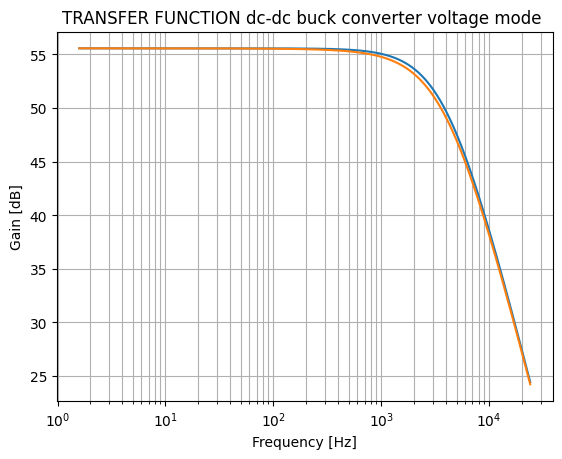

F=1/2Pisqrt(LC)= 4057.7005687709043 Hz
L= 0.00028    C= 5.5e-06


In [9]:
# Buck converter transfer fumction - VOLTAGE MODE
# from https://www.youtube.com/watch?v=VQ3Er89Mwa8
#
# BiDi AC/DC
import numpy as np
import matplotlib.pyplot as plt

L=280e-6
C=5.5e-6
R=100000
Udc=600

f=np.linspace(10,24000*2*np.pi,10000)
y=(Udc/(L*C))/(f*f+f/(R*C)+1/(L*C))
R=50
y2=(Udc/(L*C))/(f*f+f/(R*C)+1/(L*C))
plt.semilogx(f/6.28,20*np.log10(y), f/6.28,20*np.log10(y2)) 
plt.title('TRANSFER FUNCTION dc-dc buck converter voltage mode ')
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Gain [dB]') 
plt.grid(which='both', axis='both')
plt.show()
print('F=1/2Pisqrt(LC)=',1/(6.28*np.sqrt(L*C)),"Hz")




In [16]:
# Current mode voltage controlled Buck converter transfer fumction
# from https://www.ti.com/seclit/ml/slup340/slup340.pdf
# page 9,10. Equation (22)
#
# BiDi AC/DC
import numpy as np
import matplotlib.pyplot as plt

L=280e-6
Cout=5.5e-6
Resr=6e-3
Rout=100000
Avc = 1   # LEM +lowLevel Software measure Current in Ampere[A]
Ri  = 1   # Measure is in ampere. in general Ri=A*Rshunt
Fs  = 48000
Vin  = 650   # Vdc bus
Vout = 155  # hald 310V
#
###############
# Calculations
###############
Wz = 1/(Resr*Cout)
Wp=  1/(Rout*Cout)
#Wl calculation
Vslope = Vout*Ri/(L*Fs)# only for peak current control
Km = Vin/Vslope
Wl = Km*Ri/L
print ('Wp=',Wp,'   Wz=',Wz/1000000,'MHz     Wl=',Wl/1000,'KHz')

Wp= 1.8181818181818183    Wz= 30.303030303030305 MHz     Wl= 201.29032258064518 KHz
